# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [32]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [33]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [34]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Easy check in a T5. Galleri...
1,"Not Verified | Flight delayed by an hour, it ..."
2,Not Verified | The staff are very rude and not...
3,✅ Trip Verified | Good domestic flight operat...
4,Not Verified | Failed at all basic travel fund...


In [35]:
df.to_csv("BA REVIEWS.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [36]:
df

,reviews
0,✅ Trip Verified | Easy check in a T5. Galleri...
1,"Not Verified | Flight delayed by an hour, it ..."
2,Not Verified | The staff are very rude and not...
3,✅ Trip Verified | Good domestic flight operat...
4,Not Verified | Failed at all basic travel fund...
...,...
995,✅ Trip Verified | Johannesburg to London. I t...
996,✅ Trip Verified | Singapore to London Heathro...
997,✅ Trip Verified | London to Los Angeles. Book...
998,✅ Trip Verified | Miami to London Heathrow. A...


# data cleaning

Removing the parts before | in the reviews column

In [37]:
df.reviews= df.reviews.str.split('|',expand=True)[1]

In [38]:
df

,reviews
0,Easy check in a T5. Galleries south and Nort...
1,"Flight delayed by an hour, it happens, no bi..."
2,The staff are very rude and not trained prope...
3,Good domestic flight operated by BA Cityflye...
4,Failed at all basic travel fundamentals: 1) O...
...,...
995,Johannesburg to London. I tend to stay with ...
996,Singapore to London Heathrow. It's my first ...
997,London to Los Angeles. Booked this trip eigh...
998,Miami to London Heathrow. As with many other...


Rule-based approach

This is a practical approach to analyzing text without training or using machine learning models. The result of this approach is a set of rules based on which the text is labeled as positive/negative/neutral. These rules are also known as lexicons. Hence, the Rule-based approach is called Lexicon based approach.

Widely used lexicon-based approaches are TextBlob, VADER, SentiWordNet.

Data preprocessing steps:

Cleaning the text

Tokenization

Enrichment – POS tagging

Stopwords removal

Obtaining the stem words

# Step 1: Cleaning the text

In [39]:
import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,Cleaned Reviews
0,Easy check in a T5. Galleries south and Nort...,Easy check in a T Galleries south and North l...
1,"Flight delayed by an hour, it happens, no bi...",Flight delayed by an hour it happens no biggi...
2,The staff are very rude and not trained prope...,The staff are very rude and not trained prope...
3,Good domestic flight operated by BA Cityflye...,Good domestic flight operated by BA Cityflyer...
4,Failed at all basic travel fundamentals: 1) O...,Failed at all basic travel fundamentals Our f...


# 2: Tokenization

okenization is the process of breaking the text into smaller pieces called Tokens

# 3: Enrichment – POS tagging

Parts of Speech (POS) tagging is a process of converting each token into a tuple having the form (word, tag). POS tagging essential to preserve the context of the word and is essential for Lemmatization.

# 4: Stopwords removal

Stopwords in English are words that carry very little useful information. We need to remove them as part of text preprocessing. nltk has a list of stopwords of every language.

# 5: Obtaining the stem words

A stem is a part of a word responsible for its lexical meaning. The two popular techniques of obtaining the root/stem words are Stemming and Lemmatization.

The key difference is Stemming often gives some meaningless root words as it simply chops off some characters in the end. Lemmatization gives meaningful root words, however, it requires POS tags of the words.

NLTK stands for "Natural Language Toolkit." It's a powerful Python library that provides tools and resources for working with human language data (text) in various forms, including processing and analyzing natural language text. NLTK is widely used for tasks such as text analysis, text mining, text classification, sentiment analysis, and more.

In [42]:
import nltk

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\angad\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\angad\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\angad\AppData\Roaming\nltk_data...


In [43]:
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist 

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\angad\AppData\Roaming\nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\angad\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


,reviews,Cleaned Reviews,POS tagged
0,Easy check in a T5. Galleries south and Nort...,Easy check in a T Galleries south and North l...,"[(Easy, a), (check, n), (Galleries, n), (south..."
1,"Flight delayed by an hour, it happens, no bi...",Flight delayed by an hour it happens no biggi...,"[(Flight, n), (delayed, v), (hour, n), (happen..."
2,The staff are very rude and not trained prope...,The staff are very rude and not trained prope...,"[(staff, n), (rude, a), (trained, v), (properl..."
3,Good domestic flight operated by BA Cityflye...,Good domestic flight operated by BA Cityflyer...,"[(Good, a), (domestic, a), (flight, n), (opera..."
4,Failed at all basic travel fundamentals: 1) O...,Failed at all basic travel fundamentals Our f...,"[(Failed, v), (basic, a), (travel, n), (fundam..."


In [44]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,Easy check in a T5. Galleries south and Nort...,Easy check in a T Galleries south and North l...,"[(Easy, a), (check, n), (Galleries, n), (south...",Easy check Galleries south North lounge pack...
1,"Flight delayed by an hour, it happens, no bi...",Flight delayed by an hour it happens no biggi...,"[(Flight, n), (delayed, v), (hour, n), (happen...",Flight delay hour happen biggie us change ga...
2,The staff are very rude and not trained prope...,The staff are very rude and not trained prope...,"[(staff, n), (rude, a), (trained, v), (properl...",staff rude train properly exception make chi...
3,Good domestic flight operated by BA Cityflye...,Good domestic flight operated by BA Cityflyer...,"[(Good, a), (domestic, a), (flight, n), (opera...",Good domestic flight operate BA Cityflyer Gr...
4,Failed at all basic travel fundamentals: 1) O...,Failed at all basic travel fundamentals Our f...,"[(Failed, v), (basic, a), (travel, n), (fundam...",Failed basic travel fundamental flight delay...


In [45]:
df[['reviews','Lemma']]

,reviews,Lemma
0,Easy check in a T5. Galleries south and Nort...,Easy check Galleries south North lounge pack...
1,"Flight delayed by an hour, it happens, no bi...",Flight delay hour happen biggie us change ga...
2,The staff are very rude and not trained prope...,staff rude train properly exception make chi...
3,Good domestic flight operated by BA Cityflye...,Good domestic flight operate BA Cityflyer Gr...
4,Failed at all basic travel fundamentals: 1) O...,Failed basic travel fundamental flight delay...
...,...,...
995,Johannesburg to London. I tend to stay with ...,Johannesburg London tend stay airline freque...
996,Singapore to London Heathrow. It's my first ...,Singapore London Heathrow first time travel ...
997,London to Los Angeles. Booked this trip eigh...,London Los Angeles Booked trip eight month p...
998,Miami to London Heathrow. As with many other...,Miami London Heathrow many others post revie...


# Sentiment Analysis using VADER

VADER stands for Valence Aware Dictionary and Sentiment Reasoner.

Vader sentiment not only tells if the statement is positive or negative along with the intensity of emotion.

In [46]:
!pip install vaderSentiment

     ---------------------------------------- 0.0/126.0 kB ? eta -:--:--
     --------- ------------------------------ 30.7/126.0 kB ? eta -:--:--
     --------------------- --------------- 71.7/126.0 kB 991.0 kB/s eta 0:00:01
     -------------------------------------  122.9/126.0 kB 1.2 MB/s eta 0:00:01
     ------------------------------------ 126.0/126.0 kB 676.7 kB/s eta 0:00:00


In [47]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,Easy check in a T5. Galleries south and Nort...,Easy check in a T Galleries south and North l...,"[(Easy, a), (check, n), (Galleries, n), (south...",Easy check Galleries south North lounge pack...,0.9415,Positive
1,"Flight delayed by an hour, it happens, no bi...",Flight delayed by an hour it happens no biggi...,"[(Flight, n), (delayed, v), (hour, n), (happen...",Flight delay hour happen biggie us change ga...,-0.2235,Negative
2,The staff are very rude and not trained prope...,The staff are very rude and not trained prope...,"[(staff, n), (rude, a), (trained, v), (properl...",staff rude train properly exception make chi...,-0.7698,Negative
3,Good domestic flight operated by BA Cityflye...,Good domestic flight operated by BA Cityflyer...,"[(Good, a), (domestic, a), (flight, n), (opera...",Good domestic flight operate BA Cityflyer Gr...,0.9420,Positive
4,Failed at all basic travel fundamentals: 1) O...,Failed at all basic travel fundamentals Our f...,"[(Failed, v), (basic, a), (travel, n), (fundam...",Failed basic travel fundamental flight delay...,-0.9019,Negative


In [48]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Analysis
Positive    496
Negative    399
Neutral     105
Name: count, dtype: int64

# Visual Representation

([<matplotlib.patches.Wedge at 0x23064349b50>,
 [Text(0.013822671882601847, 1.0999131482721833, 'Positive'),
  Text(-0.36935851680486426, -1.0361342992410352, 'Negative'),
  Text(1.2772151775079268, -0.43728868078581135, 'Neutral')],
 [Text(0.007539639208691916, 0.5999526263302818, '49.6%'),
  Text(-0.2014682818935623, -0.5651641632223827, '39.9%'),
  Text(0.8041725191716577, -0.2753299101243997, '10.5%')])

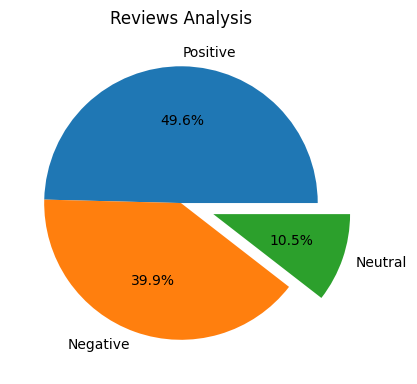

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

In [53]:
df.to_csv("BA_reviews_updated.csv")